In [1]:
import cv2
import numpy as np
np.set_printoptions(threshold=np.nan)
from matplotlib import pyplot as plt
%matplotlib inline
from math import ceil
from math import pow
from math import sqrt
from copy import deepcopy

In [2]:
image = cv2.imread('gray2.jpg',cv2.IMREAD_GRAYSCALE)
image_dash = cv2.imread('gray2.jpg',cv2.IMREAD_GRAYSCALE)

In [3]:
x_checkpoint_pixels = []
y_checkpoint_pixels = []
number_of_blocks = 16
#Assuming the image to be square shaped
step_size = image_dash.shape[0]//int(sqrt(number_of_blocks))
for checkpoint in range(0,image_dash.shape[0],step_size):
    x_checkpoint_pixels.append(checkpoint)
    y_checkpoint_pixels.append(checkpoint)
x_checkpoint_pixels.append(image_dash.shape[0])
y_checkpoint_pixels.append(image_dash.shape[0])

print(x_checkpoint_pixels)
print(y_checkpoint_pixels)

[0, 32, 64, 96, 128]
[0, 32, 64, 96, 128]


In [4]:
blockwise_pixels = []
for i in range(len(y_checkpoint_pixels)-1):
    for j in range(len(x_checkpoint_pixels)-1):
        blockwise_pixels.append(image_dash[x_checkpoint_pixels[j]:x_checkpoint_pixels[j+1],y_checkpoint_pixels[i]:y_checkpoint_pixels[i+1]])
    

In [5]:
pixels_of_block = []
for i in range(len(blockwise_pixels)):
    pixels_of_block.append(blockwise_pixels[i].flatten())

In [6]:
def compare_print(arr1,arr2):
    for m in range(len(arr1)):
        print(arr1[m],arr2[m])

In [7]:
def hide(message,px,block_no):
    #Calculate s for given pixel set
    card_px = len(px)
    s=0
    for i in range(card_px-1):
        s = s + pow(abs(int(px[i])-int(px[i+1])),block_no)
    s=s/(card_px-1)
    s=pow(s,1/block_no)
    s=ceil(s)
    
    print('s = ',s)
    valid = []
    
    
    #Create a graph for given pixel set
    grf = {}
    for i in range(card_px):
        grf[i]=[]
        valid.append(1)
    for i in range(card_px):
        for j in range(card_px):
            if(i==j):
                continue
            elif(abs(int(px[i])-int(px[j]))<s):
                grf[i].append(j)

    
    #Calculate the nodes(index of pixels) in grf that belong to maximal independent set
    grf_dash = deepcopy(grf)
    stop = False
    i=0
    while not stop :
        if(len(grf_dash[i])>0):
            j = min(grf_dash[i])
            del grf_dash[j]
            valid[j]=0
            for k in grf_dash:
                if(j in grf_dash[k]):
                    grf_dash[k].remove(j)
        else:
            q=[]
            for k in grf_dash:
                if k > i:
                    q.append(k)
            if(len(q)>0):
                i_dash = min(q)
                if(i_dash == max(grf_dash.keys())):
                    stop = True
                else:
                    i = i_dash
            else:
                stop = True
    
    print(grf_dash.keys())
    
    
    #Get new pixel values by replacing the last bits by message
    new_pixels = deepcopy(px)
    keys = list(grf_dash.keys())
    for i in keys[:4]:
        c = len(message)
        if(c>0):
            pixel_value = bin(px[i])[2:]
            replacement = message[0:2]
            message = message[2:]
            c-=2
            print('Pixel Value(Integer)              : ',px[i])
            print('Pixel Value(Binary,Before)        : ',pixel_value)
            print('Message bits to be hidden         : ',replacement)
            print('Remaining Message : ',message)
            print("               ",pixel_value[-2:]," replaced by :",replacement)
            temp_pixel = ''
            temp_pixel+=pixel_value[:-2]
            temp_pixel+=replacement
            print('             ',pixel_value," becomes : ",temp_pixel)
            for j in (grf[i]):
                #print('Adjoining Pixel value at : ',j)
                #print('Changed from : ',new_pixels[j])
                #print('j = ',j)
                new_pixels[j]-=(int(pixel_value,2)-int(temp_pixel,2))
                #print('Changed To : ',new_pixels[j])
            new_pixels[i] = int(temp_pixel,2)
            print('           ',px[i]," successfully changed to ",new_pixels[i])
        else:
            print("\n##########MESSAGE FINISHED#################")
            return new_pixels,1,message
    print('\n***************Block Finished. Switching to new block***************')
    return new_pixels,0,message

In [8]:
def message_to_binary(message):
    final_message = []
    for i in message:
        final_message.append(bin(ord(i))[2:])
    for i in range(len(final_message)):
        if(len(final_message[i])<8):
            index_to_which_padding_done = len(final_message[i])
            temp = ''
            for j in range(8-len(final_message[i])):
                temp += '0'
            temp += final_message[i]
            final_message[i] = temp
    final_message_string = ''
    for i in final_message:
        final_message_string += i
    print(final_message_string)
    return final_message_string

In [9]:
message = 'Hello'
message = message+'#'
message_in_binary = message_to_binary(message)
finish = False
block_counter = 0
list_of_new_blocks = []
while(not finish):
    new_block, status, message_in_binary = hide(message_in_binary,pixels_of_block[block_counter],block_counter+1)
    list_of_new_blocks.append(new_block)
    if(status == 1):  #finished the message
        finish = True
    else:#block finished
        block_counter += 1
#new_block = hide_a_message(message,0)

010010000110010101101100011011000110111100100011
s =  9
dict_keys([0, 11, 14, 15, 16, 18, 31, 37, 78, 304, 529, 991, 1023])
Pixel Value(Integer)              :  137
Pixel Value(Binary,Before)        :  10001001
Message bits to be hidden         :  01
Remaining Message :  0010000110010101101100011011000110111100100011
                01  replaced by : 01
              10001001  becomes :  10001001
            137  successfully changed to  137
Pixel Value(Integer)              :  151
Pixel Value(Binary,Before)        :  10010111
Message bits to be hidden         :  00
Remaining Message :  10000110010101101100011011000110111100100011
                11  replaced by : 00
              10010111  becomes :  10010100
            151  successfully changed to  148
Pixel Value(Integer)              :  118
Pixel Value(Binary,Before)        :  1110110
Message bits to be hidden         :  10
Remaining Message :  000110010101101100011011000110111100100011
                10  replaced by : 10
       

In [10]:
counter = 0
for i in range(len(y_checkpoint_pixels)-1):
    for j in range(len(x_checkpoint_pixels)-1):
        if(counter >= len(list_of_new_blocks)):
            break
        #print('a')
        image_dash[x_checkpoint_pixels[j]:x_checkpoint_pixels[j+1],y_checkpoint_pixels[i]:y_checkpoint_pixels[i+1]] = np.reshape(np.asarray(list_of_new_blocks[counter]),(step_size,step_size))
        counter += 1
        

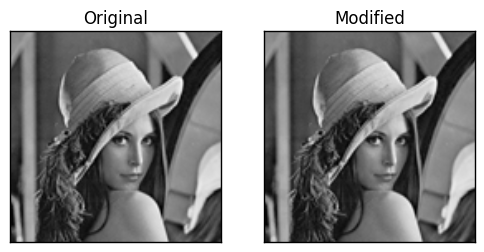

In [11]:
a=plt.subplot(121)
a.imshow(image,cmap='gray')
a.set_title("Original")
plt.xticks([]), plt.yticks([])
b=plt.subplot(122)
b.imshow(image_dash, cmap = 'gray')
b.set_title("Modified")
plt.xticks([]), plt.yticks([])
plt.show()

In [12]:
image[0][0]

137

In [13]:
print(list(pixels_of_block[0]))

[137, 135, 136, 133, 135, 130, 129, 129, 131, 137, 144, 151, 149, 138, 118, 86, 62, 65, 72, 74, 76, 77, 76, 77, 77, 75, 80, 85, 87, 92, 93, 96, 134, 132, 134, 129, 130, 128, 127, 129, 129, 136, 145, 149, 149, 138, 113, 83, 60, 61, 66, 74, 73, 73, 72, 74, 74, 74, 79, 85, 88, 93, 92, 93, 132, 129, 132, 129, 129, 130, 126, 127, 129, 140, 145, 148, 148, 133, 109, 82, 57, 55, 64, 69, 70, 70, 73, 71, 70, 74, 79, 83, 87, 92, 91, 94, 131, 130, 131, 130, 129, 128, 126, 129, 137, 144, 147, 146, 144, 131, 106, 80, 59, 57, 64, 68, 72, 76, 73, 69, 69, 72, 79, 82, 86, 91, 92, 94, 130, 129, 130, 131, 131, 128, 127, 133, 142, 145, 143, 143, 139, 126, 108, 83, 58, 58, 64, 68, 73, 73, 70, 71, 70, 69, 78, 82, 86, 89, 93, 93, 130, 129, 131, 133, 133, 129, 128, 135, 144, 142, 142, 139, 136, 129, 110, 88, 61, 58, 64, 69, 73, 70, 71, 70, 71, 71, 78, 81, 86, 88, 89, 91, 129, 129, 131, 132, 132, 129, 132, 140, 145, 142, 139, 135, 135, 130, 109, 79, 57, 55, 62, 70, 71, 71, 73, 70, 69, 72, 76, 80, 87, 89, 89, 93

In [14]:
image_dash[0][0]

137

In [15]:
print(image_dash.shape)

(128, 128)


In [16]:
#SUCCESS AT LAST
cv2.imwrite('gray2_encoded.jpg',image_dash)

True